### LIBRARIES:

In [11]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools
import warnings

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc,precision_score,recall_score

warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)
sns.set()

In [2]:
def print_roc_curve(classifier, X_test,y_test):
    y_scores = classifier.predict_proba(X_test)
    y_pred = y_scores[:,1]
    fpr, tpr,_ = roc_curve(y_test,y_pred)
    roc_auc = auc(fpr,tpr)
    
    plt.figure()
    
    plt.plot(fpr,tpr,label = 'AUC = %0.2f' % roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.00])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')

    plt.show()
       
#def print_roc_curve(classifier, X_test, y_test, model_name, plt):
    #y_scores = classifier.predict_proba(X_test)
    #y_pred = y_scores[:,1]
    #fpr, tpr,_ = roc_curve(y_test,y_pred)
    #roc_auc = auc(fpr,tpr)

    #plt.plot(fpr,tpr,label = f'{model_name} AUC = %0.2f' % roc_auc)

#plt.figure()

#print_roc_curve(grid_result_lr, x_test_scaled, y_test, 'Logistic Regression', plt)
#print_roc_curve(grid_result_kn, x_test_scaled, y_test, 'KNN', plt)

#plt.plot([0,1],[0,1],'r--')
#plt.legend(loc = 'lower right')
#plt.xlim([0.0,1.0])
#plt.ylim([0.0,1.00])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic')

#plt.show()


#### DATASET LOADING AND CHECKS...

In [3]:
bank = pd.read_csv(r'bank-additional-full.csv',sep=';')

display(bank.head())
display('-----------------------------------------------------------------------------------------------------------------------')
display(bank.shape)
display('------------------------------------------------------------------------------------------------------------------------')
display(bank.isnull().sum())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


'-----------------------------------------------------------------------------------------------------------------------'

(41188, 21)

'------------------------------------------------------------------------------------------------------------------------'

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### Renaming some columns:

In [4]:
bank.rename(columns = {
  'default': 'has_credit_in_default',
  'housing': 'has_housing_loan',
  'loan': 'has_personal_loan',
  'month': 'last_month_contacted',
 'day_of_week': 'last_day_of_week_contacted',
 'duration': 'last_contact_duration_secs',
 'pdays': 'p_days',
 'poutcome': 'p_outcome',
 'emp.var.rate': 'emp_var_rate',
 'cons.price.idx': 'cons_price_idx',
 'cons.conf.idx': 'cons_conf_idx',
 'nr.employed': 'nr_employed',
 'eurobor3m': 'euribor_3_month_rate ',
 'y': 'is_term_deposit',
 },inplace = True)

bank.head()

,age,job,marital,education,has_credit_in_default,has_housing_loan,has_personal_loan,contact,last_month_contacted,last_day_of_week_contacted,last_contact_duration_secs,campaign,p_days,previous,p_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,is_term_deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Converting some object dtypes into categorials:

In [5]:
category_columns = ['marital','p_outcome','has_credit_in_default','has_housing_loan','has_personal_loan']    

bank[category_columns] = bank[category_columns].astype('category')

In [6]:
bank['is_term_deposit'] = bank['is_term_deposit'].astype(str)

display(bank['is_term_deposit'].value_counts(), bank['is_term_deposit'].value_counts(normalize=True))

no     36548
yes     4640
Name: is_term_deposit, dtype: int64

no     0.887346
yes    0.112654
Name: is_term_deposit, dtype: float64

#### Mapping the output y:

In [7]:
bank['is_term_deposit'] = bank['is_term_deposit'].astype(str)
bank['is_term_deposit'] = bank['is_term_deposit'].map({'yes': 1, 'no':0})

bank.head()

,age,job,marital,education,has_credit_in_default,has_housing_loan,has_personal_loan,contact,last_month_contacted,last_day_of_week_contacted,last_contact_duration_secs,campaign,p_days,previous,p_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,is_term_deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [8]:
bank2 = bank.loc[:,~bank.columns.isin(['last_month_contacted','last_day_of_week_contacted'])]
bank2.head()

,age,job,marital,education,has_credit_in_default,has_housing_loan,has_personal_loan,contact,last_contact_duration_secs,campaign,p_days,previous,p_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,is_term_deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [10]:
bank3 = bank.loc[:,~bank.columns.isin(['p_days','previous'])]

#### Some  insights by visualization:

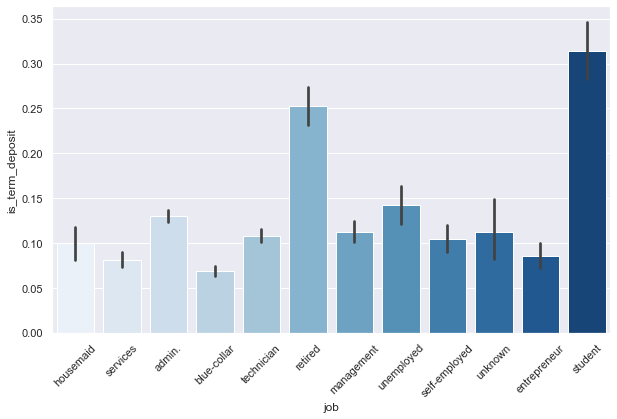

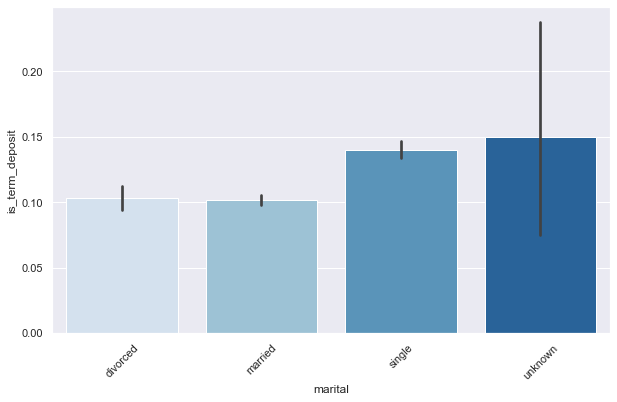

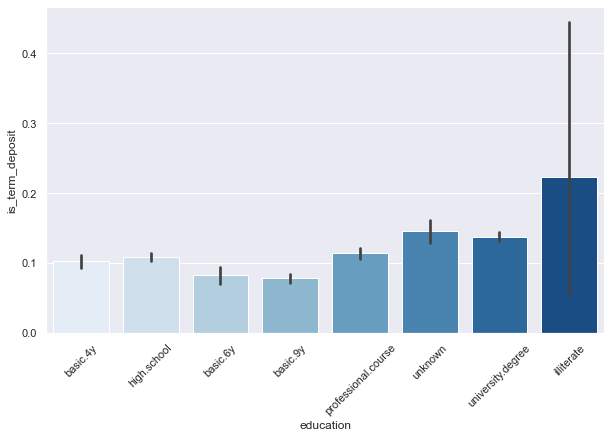

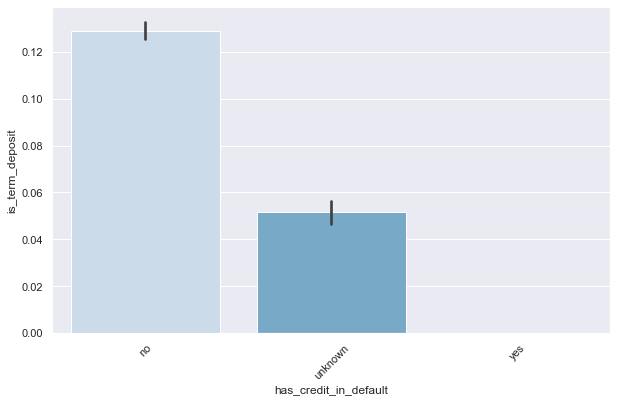

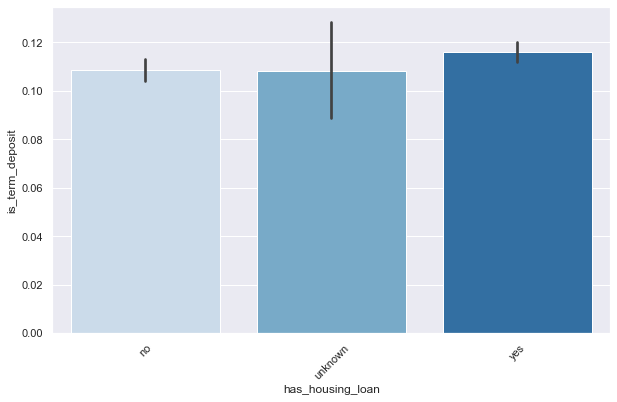

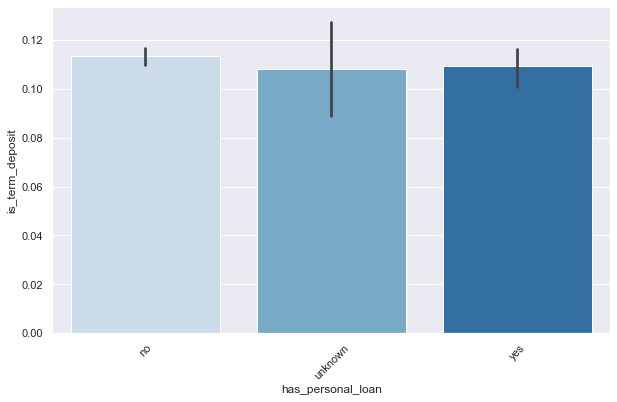

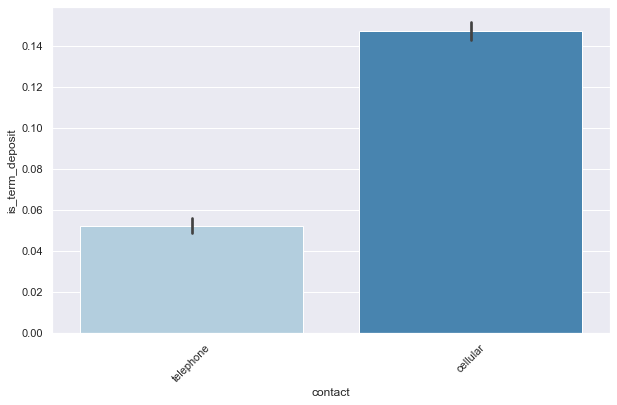

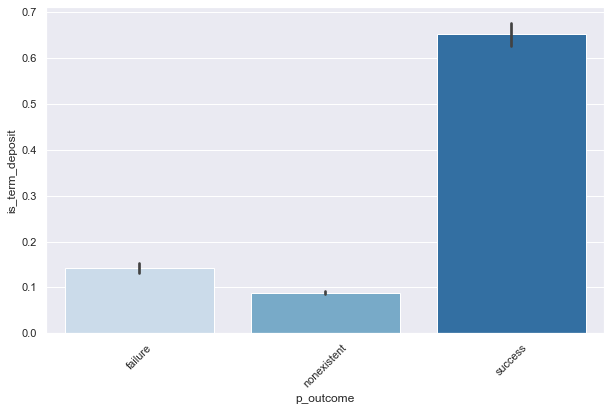

In [12]:
categories = bank2.select_dtypes(include=['object','category']).columns

for col in categories:
    plt.figure(figsize = (10, 6))
    chart = sns.barplot(x = col, y='is_term_deposit', data = bank,palette="Blues")#order=bank.sort_values(col))#is_term_deposit : 0,1
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

C:\Users\alatakl\AppData\Local\Temp\5/ipykernel_19552/4113353749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.boxplot(x = 'is_term_deposit', y=col, data = bank,palette="Blues")


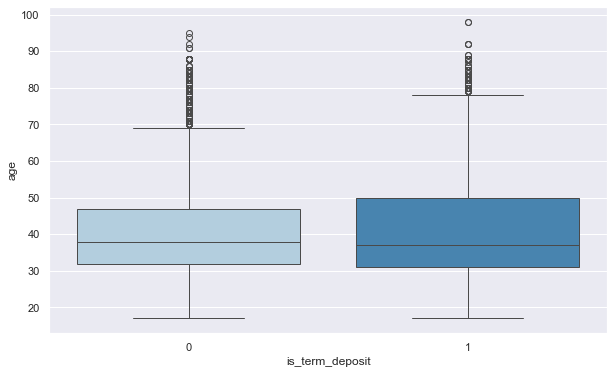

C:\Users\alatakl\AppData\Local\Temp\5/ipykernel_19552/4113353749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.boxplot(x = 'is_term_deposit', y=col, data = bank,palette="Blues")


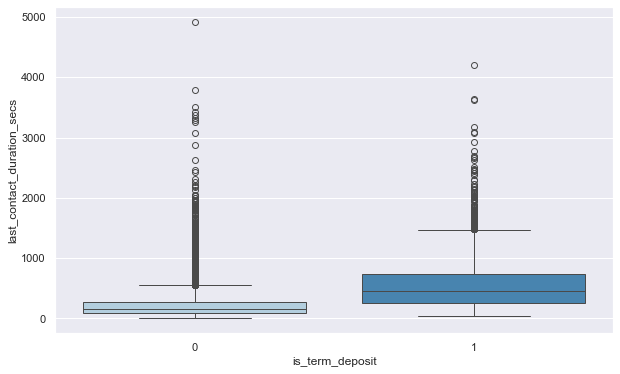

C:\Users\alatakl\AppData\Local\Temp\5/ipykernel_19552/4113353749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.boxplot(x = 'is_term_deposit', y=col, data = bank,palette="Blues")


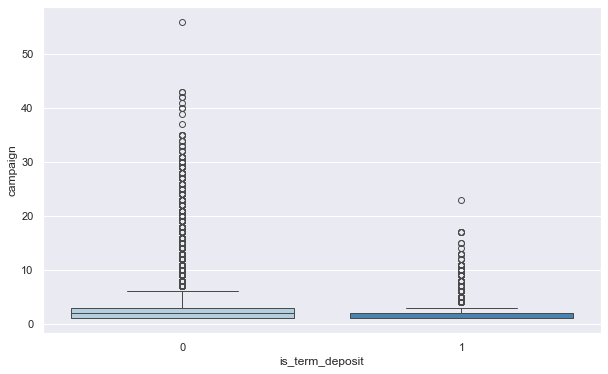

C:\Users\alatakl\AppData\Local\Temp\5/ipykernel_19552/4113353749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.boxplot(x = 'is_term_deposit', y=col, data = bank,palette="Blues")


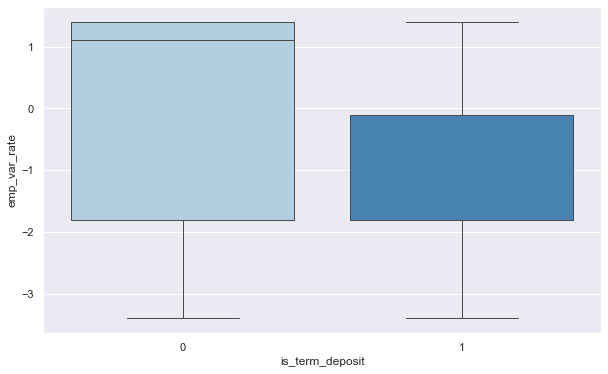

C:\Users\alatakl\AppData\Local\Temp\5/ipykernel_19552/4113353749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.boxplot(x = 'is_term_deposit', y=col, data = bank,palette="Blues")


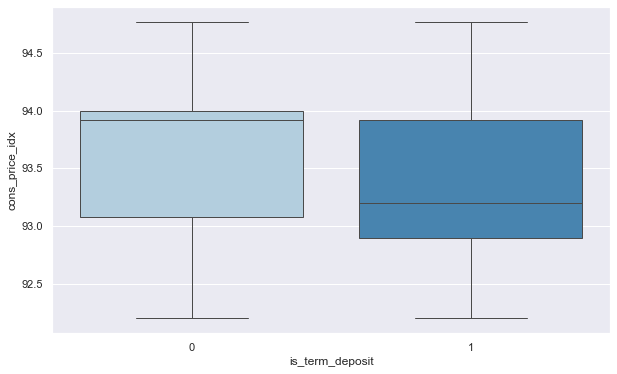

C:\Users\alatakl\AppData\Local\Temp\5/ipykernel_19552/4113353749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.boxplot(x = 'is_term_deposit', y=col, data = bank,palette="Blues")


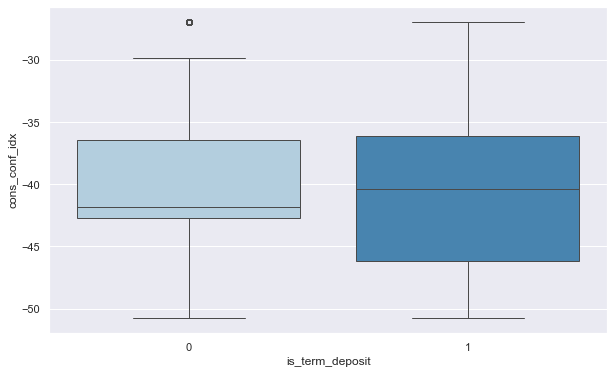

C:\Users\alatakl\AppData\Local\Temp\5/ipykernel_19552/4113353749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.boxplot(x = 'is_term_deposit', y=col, data = bank,palette="Blues")


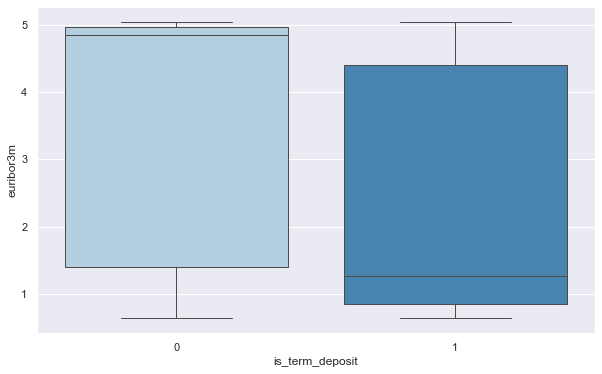

C:\Users\alatakl\AppData\Local\Temp\5/ipykernel_19552/4113353749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.boxplot(x = 'is_term_deposit', y=col, data = bank,palette="Blues")


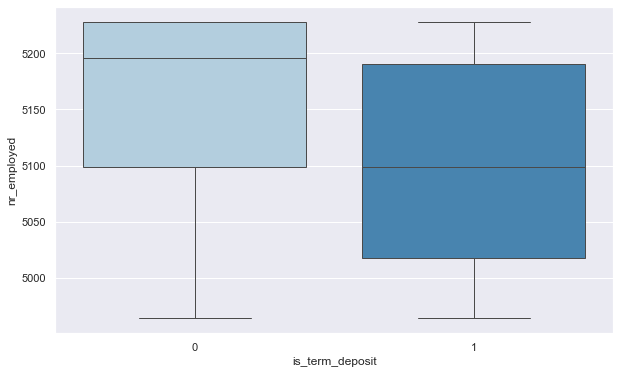

C:\Users\alatakl\AppData\Local\Temp\5/ipykernel_19552/4113353749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.boxplot(x = 'is_term_deposit', y=col, data = bank,palette="Blues")


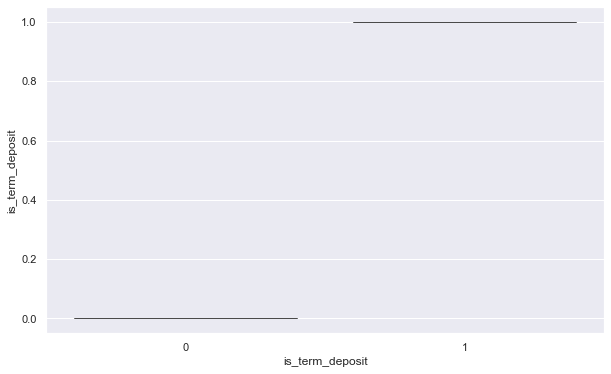

In [11]:
bank3 = bank.loc[:,~bank.columns.isin(['p_days','previous'])]

numericals = bank3.select_dtypes(include=['float','int']).columns

for col in numericals:
    plt.figure(figsize=(10,6))
    chart = sns.boxplot(x = 'is_term_deposit', y=col, data = bank,palette="Blues")
    plt.show()

#### HEAT MAP: Correlation

<AxesSubplot:>

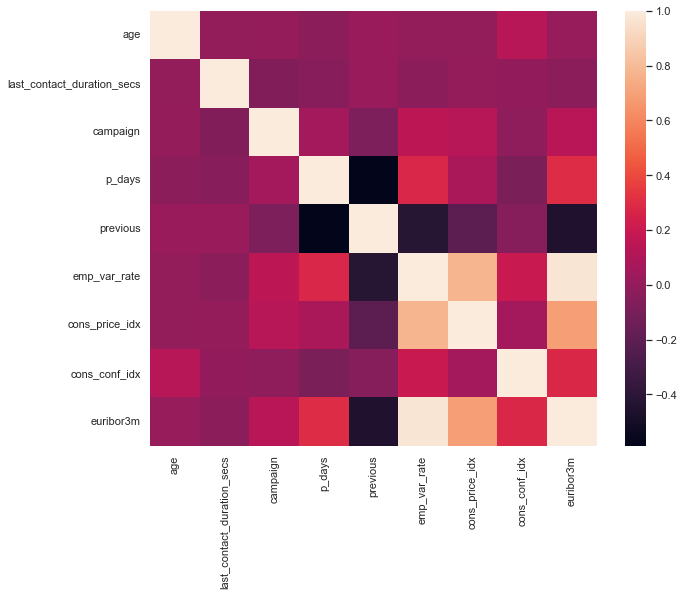

In [16]:
plt.figure(figsize=(10,8))
X = bank[['age','last_contact_duration_secs','campaign','p_days','previous','emp_var_rate',
        'cons_price_idx','cons_conf_idx','euribor3m']]

sns.heatmap(X.corr())

In [17]:
val_for_the_model = bank[['age',
                          'last_contact_duration_secs',
                          'campaign',
                          'p_days',
                          'previous',
                          'emp_var_rate', 
                          'cons_price_idx',
                          'cons_conf_idx',
                          'euribor3m',
                          'is_term_deposit']]

#### Dealing with categorical data for the features of Intereset:

In [18]:
one_hot_encoding_columns = ['has_credit_in_default','contact','p_outcome','last_month_contacted']
one_hot_encoding_data = bank[one_hot_encoding_columns]
encoder = OneHotEncoder(categories = 'auto', sparse = False, handle_unknown = 'error')
encoder.fit(one_hot_encoding_data)

category_set = encoder.transform(one_hot_encoding_data)
category_set = pd.DataFrame(category_set)
category_set.columns = encoder.get_feature_names()#get_features_names_out()
category_set

#get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead

C:\Users\alatakl\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_no,x0_unknown,x0_yes,x1_cellular,x1_telephone,x2_failure,x2_nonexistent,x2_success,x3_apr,x3_aug,x3_dec,x3_jul,x3_jun,x3_mar,x3_may,x3_nov,x3_oct,x3_sep
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41184,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41185,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41186,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Modeling:

In [19]:
data = pd.concat([category_set, val_for_the_model],axis=1)
data

,x0_no,x0_unknown,x0_yes,x1_cellular,x1_telephone,x2_failure,x2_nonexistent,x2_success,x3_apr,x3_aug,x3_dec,x3_jul,x3_jun,x3_mar,x3_may,x3_nov,x3_oct,x3_sep,age,last_contact_duration_secs,campaign,p_days,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,is_term_deposit
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,56,261,1,999,0,1.1,93.994,-36.4,4.857,0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,57,149,1,999,0,1.1,93.994,-36.4,4.857,0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,37,226,1,999,0,1.1,93.994,-36.4,4.857,0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,40,151,1,999,0,1.1,93.994,-36.4,4.857,0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,56,307,1,999,0,1.1,93.994,-36.4,4.857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,73,334,1,999,0,-1.1,94.767,-50.8,1.028,1
41184,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,46,383,1,999,0,-1.1,94.767,-50.8,1.028,0
41185,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,56,189,2,999,0,-1.1,94.767,-50.8,1.028,0
41186,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,44,442,1,999,0,-1.1,94.767,-50.8,1.028,1


#### Define X and y :

In [20]:
X = data.loc[:,~data.columns.isin(['is_term_deposit'])]

y = data.loc[:, 'is_term_deposit']

#### TRAIN-TEST-SPLIT:

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 0, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32950, 27), (8238, 27), (32950,), (8238,))

#### STANDARDIZE TRAIN-TEST:

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.fit_transform(X_test)

#### Model 1 :
#### Logistic Regression
##### * Without HyperParameter Tuning

In [23]:
logreg = LogisticRegression()
logreg.fit(x_train_scaled, y_train)

y_pred_log = logreg.predict(x_test_scaled)

In [25]:
print(f"Accuracy score for LogisticRegression implementation in test: {accuracy_score(y_test,y_pred_log)}")
print(f"Accuracy score for LogisticRegression implementation in train: {accuracy_score(y_train,logreg.predict(x_train_scaled))}")


print(f"Confusion Matrix for LogisticRegression implementation:\n {confusion_matrix(y_test,y_pred_log)}")
print(f"Classification Report for LogisticRegression implementation:\n {classification_report(y_test,y_pred_log)}")


Accuracy score for LogisticRegression implementation in test: 0.915877640203933
Accuracy score for LogisticRegression implementation in train: 0.909711684370258
Confusion Matrix for LogisticRegression implementation:
 [[7112  207]
 [ 486  433]]
Classification Report for LogisticRegression implementation:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7319
           1       0.68      0.47      0.56       919

    accuracy                           0.92      8238
   macro avg       0.81      0.72      0.75      8238
weighted avg       0.91      0.92      0.91      8238



##### * HyperParameter Tuning with GridSearch

In [48]:
model_lr = LogisticRegression()

regularization_values = ['l1','l2']
solver_values = ['saga','liblinear']#Stochastic Average Gradient Descent

param_grid_lr = dict(penalty = regularization_values, solver = solver_values)#{'penalty': ['l1', 'l2'], 'solver': ['saga', 'liblinear']}

grid_lr = GridSearchCV(estimator = model_lr, param_grid = param_grid_lr, scoring = None)#scoring = None => default "accuracy"

grid_result_lr = grid_lr.fit(x_train_scaled, y_train)

print("The best parameters are:", grid_result_lr.best_params_ ,"The best score are:", grid_result_lr.best_score_)
 

C:\Users\alatakl\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\alatakl\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\alatakl\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\alatakl\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\alatakl\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\alatakl\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: T

The best parameters are: {'penalty': 'l2', 'solver': 'saga'} The best score are: 0.9094992412746585


C:\Users\alatakl\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### Implement Logistic with best hyperparams:

In [82]:
classifier_logistics = LogisticRegression(solver ='saga' ,#grid_result_lr.best_estimator_.solver
                                            penalty = 'l2',#grid_result_lr.best_estimator_.penalty
                                            fit_intercept = True,
                                             ).fit(x_train_scaled, y_train)



y_pred_train_logistics = classifier_logistics.predict(x_train_scaled)

y_pred_test_logistics = classifier_logistics.predict(x_test_scaled)



print("Test accuracy:{}".format(accuracy_score(y_test, y_pred_test_logistics.round())))
print("Train accuracy:{}".format(accuracy_score(y_train, y_pred_train_logistics.round())))
print(" ") 

print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred_test_logistics))


print(" ")

print("Classification Report:")
print(classification_report(y_test,y_pred_test_logistics))

print(" ")



Test accuracy:0.9161204175770818
Train accuracy:0.9097723823975721
 
Confusion Matrix:
[[7117  202]
 [ 489  430]]
 
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7319
           1       0.68      0.47      0.55       919

    accuracy                           0.92      8238
   macro avg       0.81      0.72      0.75      8238
weighted avg       0.91      0.92      0.91      8238

 


C:\Users\alatakl\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### Model 2 :
#### K-Nearest Neighbor
##### * Without HyperParameter Tuning

In [59]:
knn1 = KNeighborsClassifier()
knn1.fit(x_train_scaled, y_train)

y_pred_knn1 = knn1.predict(x_test_scaled)


print(f"Accuracy score for KNN implementation in test: {accuracy_score(y_test,y_pred_knn1)}")
print(f"Accuracy score for KNN implementation in train: {accuracy_score(y_train,knn1.predict(x_train_scaled))}")


print(f"Confusion Matrix for KNN implementation:\n {confusion_matrix(y_test,y_pred_knn1)}")
print(f"Classification Report for KNN implementation:\n {classification_report(y_test,y_pred_knn1)}")


Accuracy score for KNN implementation in test: 0.9085943190094683
Accuracy score for KNN implementation in train: 0.9310166919575114
Confusion Matrix for KNN implementation:
 [[7033  286]
 [ 467  452]]
Classification Report for KNN implementation:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7319
           1       0.61      0.49      0.55       919

    accuracy                           0.91      8238
   macro avg       0.78      0.73      0.75      8238
weighted avg       0.90      0.91      0.90      8238



##### * HyperParameter Tuning with GridSearch

In [ ]:
model_kneighbors = KNeighborsClassifier()

neighbors_values = [3,4,5]
p_values = [1,2] #p=1 manhattan distance, p=2 euclidean distance


param_grid_kn = dict(n_neighbors = neighbors_values, p = p_values)

grid_kn = GridSearchCV(estimator = model_kneighbors, param_grid = param_grid_kn, scoring = None)#scoring = None => default "accuracy"

grid_result_kn = grid_kn.fit(x_train_scaled,y_train)

print("The best parameters are:", grid_result_kn.best_params_ ,"The best score is:", grid_result_kn.best_score_)

#### KNN implementation with the best hyperparams:

In [83]:
classifier_kneighbors = KNeighborsClassifier(n_neighbors = 5, #grid_result_kn.best_estimator_.n_neighbors,grid_result_kn.best_estimator_.p
                                             p = 1).fit(x_train_scaled, y_train)



y_pred_train_kneighbors = classifier_kneighbors.predict(x_train_scaled)

y_pred_test_kneighbors = classifier_kneighbors.predict(x_test_scaled)



print("Test accuracy:{}".format(accuracy_score(y_test, y_pred_test_kneighbors.round())))
print("Train accuracy:{}".format(accuracy_score(y_train, y_pred_train_kneighbors.round())))
print(" ") 

print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred_test_kneighbors))


print(" ")

print("Classification Report:")
print(classification_report(y_test,y_pred_test_kneighbors))

print(" ")



Test accuracy:0.9039815489196407
Train accuracy:0.930288315629742
 
Confusion Matrix:
[[7014  305]
 [ 486  433]]
 
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7319
           1       0.59      0.47      0.52       919

    accuracy                           0.90      8238
   macro avg       0.76      0.71      0.73      8238
weighted avg       0.90      0.90      0.90      8238

 


#### Model 3 :
#### SVM
##### * Without HyperParameter Tuning


In [69]:
%%time

from sklearn import svm

svm_1 = svm.SVC()

svm_1.fit(x_train_scaled, y_train)

y_pred_svm = svm_1.predict(x_test_scaled)


print(f"Accuracy score for SVM implementation is: {accuracy_score(y_test,y_pred_svm)}")
print(f"Accuracy score for SVM implementation in train is: {accuracy_score(y_train,svm_1.predict(x_train_scaled))}")


print(f"Confusion Matrix for SVM implementation is:\n {confusion_matrix(y_test,y_pred_svm)}")
print(f"Classification Report for SVM implementation is:\n {classification_report(y_test,y_pred_svm)}")


Accuracy score for SVM implementation is: 0.9133284777858703
Accuracy score for SVM implementation in train is: 0.9129286798179059
Confusion Matrix for SVM implementation is:
 [[7164  155]
 [ 559  360]]
Classification Report for SVM implementation is:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7319
           1       0.70      0.39      0.50       919

    accuracy                           0.91      8238
   macro avg       0.81      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238

Wall time: 53.8 s


##### * HyperParameter Tuning with GridSearch

In [72]:
from sklearn import svm

estimator_svc = svm.SVC()

kernels = ['poly', 'rbf']
Cs = np.linspace(0.1,3,7)
degrees = [2,3]


param_grid_sv=dict(kernel=kernels, C=Cs, degree=degrees)

grid_sv = GridSearchCV(estimator = estimator_svc, param_grid = param_grid_sv, scoring = None)#scoring = None => default "accuracy"

grid_result_sv = grid_sv.fit(x_train_scaled,y_train)

print("The best parameters are:", grid_result_sv.best_params_ ,"The best score is:", grid_result_sv.best_score_)
 


The best parameters are: {'C': 3.0, 'degree': 2, 'kernel': 'rbf'} The best score is: 0.9082852807283764


#### SVM implementation with the best hyperparams:

In [77]:
classifier_svm = svm.SVC(C=3,degree=2,kernel='rbf').fit(x_train_scaled, y_train)


y_pred_train_svm = classifier_svm.predict(x_train_scaled)
y_pred_test_svm = classifier_svm.predict(x_test_scaled)


print("Test accuracy:{}".format(accuracy_score(y_test, y_pred_test_svm.round())))
print("Train accuracy:{}".format(accuracy_score(y_train, y_pred_train_svm.round())))
print(" ") 

print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred_test_svm))


print(" ")
print("Classification Report:")
print(classification_report(y_test,y_pred_test_svm))
print(" ")



Test accuracy:0.913814032532168
Train accuracy:0.9182094081942337
 
Confusion Matrix:
[[7160  159]
 [ 551  368]]
 
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7319
           1       0.70      0.40      0.51       919

    accuracy                           0.91      8238
   macro avg       0.81      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238

 


END